<a href="https://colab.research.google.com/github/kayeekim/kayeekim.github.io/blob/master/_code_practice/%EC%8B%A4%EB%AC%B4%EC%97%90_%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_11_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 실무에 활용하는 머신러닝 - 고려사이버대학교

http://www.kocw.net/home/cview.do?mty=p&kemId=1380150

## 군집화 알고리즘 활용 실습(1)
### K-means 알고리즘 기초 실습

In [2]:
#from google.colab import drive
#drive.mount('/gdrive')
#filename = '/gdrive/My Drive/kmeans.csv'

## 강의 데이터 대신 iris 데이터로 대체.

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load data
from sklearn.datasets import load_iris

iris = load_iris()
#iris
data = iris.data[:,[0,1]]
print(data[:10])

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]


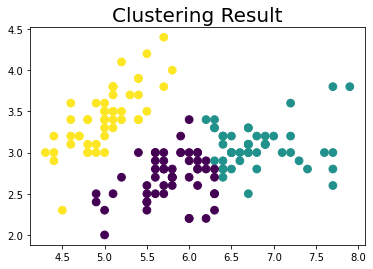

In [7]:
# Clustering 수행 및 시각화
kmeans_iris = KMeans(n_clusters=3).fit(data)

labels = kmeans_iris.labels_
plt.title('Clustering Result', fontsize=20)
plt.scatter(data[:,0], data[:,1], c=labels, s=60)

In [9]:
# 분류 정확도 확인
target = iris.target # iris dataset에서 제공하는 target값. 
df = pd.DataFrame({'labels': labels, 'target': target})
ct = pd.crosstab(df['labels'], df['target'])
ct

target,0,1,2
labels,,,
0,0,38,15
1,0,12,35
2,50,0,0


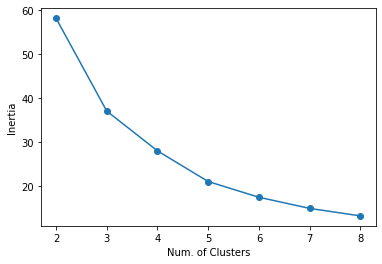

In [10]:
# 최적의 k값 찾기 
"""
그룹에 포함된 데이터들이 퍼져있는 정도를 inertia 라고 하는데, 
Inertia는 각 클러스터의 중심인 centroid와 각 데이터들 사이의 거리를 나타냅니다. 
즉, Inertia가 낮은 그룹을 ‘좋은’ 그룹이라 할 수 있고, 이러한 그룹을 적게 만들수록 좋은 모델이라고 할 수 있습니다.

출처: https://eunsukimme.github.io/ml/2019/12/16/K-Means/
"""
num_clusters = list(range(2, 9))
inertias = []

for i in num_clusters:
  model = KMeans(n_clusters=i)
  model.fit(data)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Num. of Clusters')
plt.ylabel('Inertia')
plt.show()

## 군집화 알고리즘 활용 실습(2)
### Hierarchical Clustering 알고리즘 기초 실습